In [1]:
!pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/948.2 kB 730.2 kB/s eta 0:00:01
     ----------------------------- ------ 786.4/948.2 kB 860.9 kB/s eta 0:00:01
     ------------------------------------ 948.2/948.2 kB 896.9 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=dd68c79cb26e4f795041f1e24537f582b9fddf9807d9d4f17be90cc4a826f430
  Stored in directory: c:\users\thryambica s\appdata\lo

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
GOOG_SDATA = yf.Ticker("GOOG")

In [10]:
GOOG_SDATA = yf.download("GOOG", start= '2023-12-01',end='2024-12-01')

[*********************100%***********************]  1 of 1 completed


In [11]:
GOOG_SDATA

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2023-12-01,132.842697,133.320007,133.500000,132.151993,133.320007,24258400
2023-12-04,130.162308,130.630005,131.449997,129.399994,131.294006,24117100
2023-12-05,131.916016,132.389999,133.539993,129.729996,130.369995,19235100
2023-12-06,130.959427,131.429993,133.309998,131.309998,132.899994,16360600
2023-12-07,137.954315,138.449997,140.000000,136.229996,136.600006,38419400
...,...,...,...,...,...,...
2024-11-22,166.381256,166.570007,168.264999,165.710007,167.160004,24497000
2024-11-25,169.237991,169.429993,170.460007,167.399994,167.990005,21395700


In [12]:
df = pd.read_excel("C:\\Users\\THRYAMBICA S\\Downloads\\Google.xlsx")

In [13]:
df

,Date,Close
0,2023-12-01,133.320007
1,2023-12-04,130.630005
2,2023-12-05,132.389999
3,2023-12-06,131.429993
4,2023-12-07,138.449997
...,...,...
246,2024-11-22,166.570007
247,2024-11-25,169.429993
248,2024-11-26,170.619995
249,2024-11-27,170.820007


In [14]:
df.set_index("Date", inplace = True)

In [15]:
df.head()

,Close
Date,
2023-12-01,133.320007
2023-12-04,130.630005
2023-12-05,132.389999
2023-12-06,131.429993
2023-12-07,138.449997


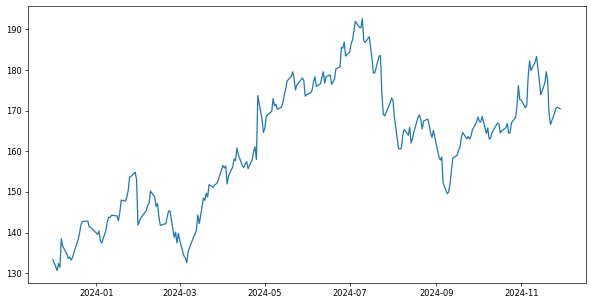

In [19]:
plt.figure(figsize =(12,6), dpi = 60)
plt.title = ("Google Stock Price")
plt.plot(df.Close)

In [22]:
from statsmodels.tsa.stattools import kpss

In [23]:
stats, p, lags, critical_values = kpss(df["Close"], "ct")

C:\Users\THRYAMBICA S\AppData\Local\Temp\ipykernel_2236\628657139.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = kpss(df["Close"], "ct")


In [24]:
stats

0.3598166097307012

In [25]:
p

0.01

In [26]:
critical_values

{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}

#Checking with ADS Test : 
p<0.05 Stationary series ; p>0.05 Trending series

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
score = adfuller(df["Close"])

In [29]:
score

(-1.9191842406857316,
 0.32309075078189625,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1136.5881619054185)

#p =  0.32309075078189625, Converting it into stationary series

In [31]:
df["Close_diff"]= df ["Close"]-df["Close"].shift(1)

df["Close_diff"]

Date
2023-12-01         NaN
2023-12-04   -2.690002
2023-12-05    1.759995
2023-12-06   -0.960007
2023-12-07    7.020004
                ...   
2024-11-22   -2.669998
2024-11-25    2.859985
2024-11-26    1.190002
2024-11-27    0.200012
2024-11-29   -0.330002
Name: Close_diff, Length: 251, dtype: float64

<Axes: xlabel='Date'>

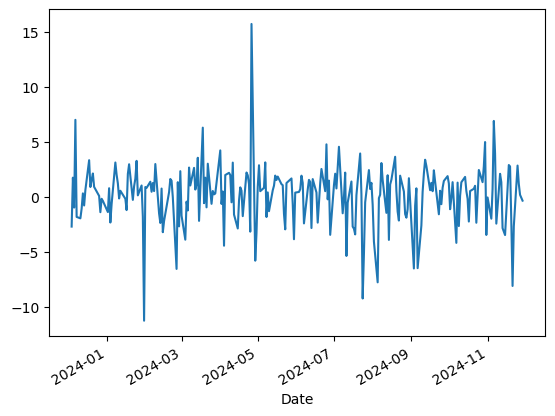

In [32]:
df["Close_diff"].dropna().plot()

In [34]:
score1 = adfuller(df["Close_diff"].dropna())

In [35]:
score1

(-15.563228397739541,
 2.0300214916570428e-28,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 1135.4150512604697)

Seasonal Differencing-Differencing of order n 

y(t)=y(t)-y(t-n)

In [38]:
df["Close_diff5"] = df["Close"] - df["Close"].shift(5)

In [39]:
df["Close_diff5"]

Date
2023-12-01         NaN
2023-12-04         NaN
2023-12-05         NaN
2023-12-06         NaN
2023-12-07         NaN
                ...   
2024-11-22   -7.319992
2024-11-25   -7.370010
2024-11-26   -8.960007
2024-11-27   -6.509995
2024-11-29    1.250000
Name: Close_diff5, Length: 251, dtype: float64

<Axes: xlabel='Date'>

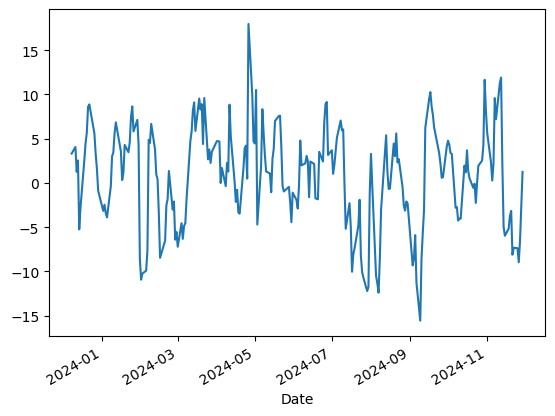

In [40]:
df["Close_diff5"].dropna().plot()

In [41]:
score5 =adfuller(df["Close_diff5"].dropna())

score5

(-3.344895909530436,
 0.012987081865384036,
 15,
 230,
 {'1%': -3.459105583381277,
  '5%': -2.8741898504150574,
  '10%': -2.5735117958412097},
 1177.9758164611171)

Plotting for acf and pacf to understand which technique to use for forecast

In [42]:
!pip install statsmodels

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

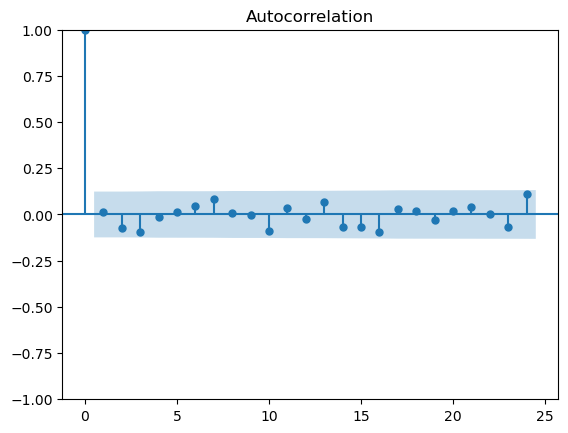

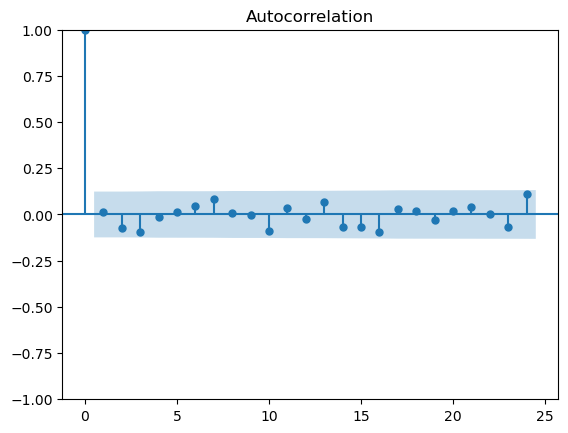

In [44]:
plot_acf(df["Close_diff"].dropna())

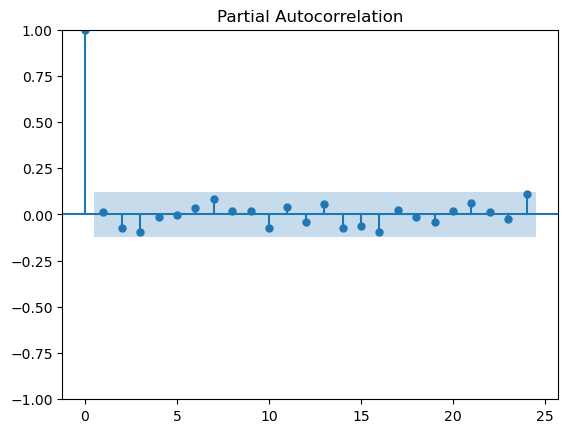

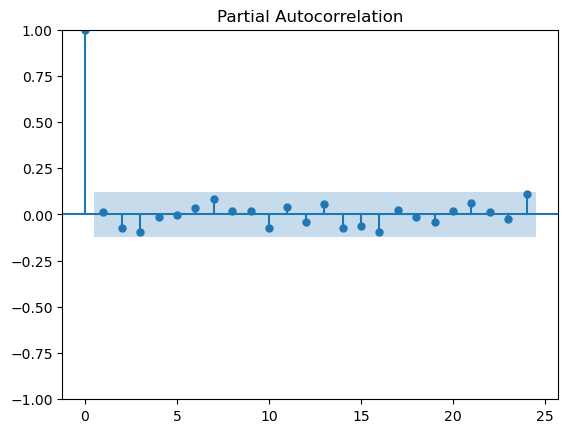

In [45]:
plot_pacf(df["Close_diff"].dropna())

# Forecasting with AR using AutoReg

In [47]:
from statsmodels.tsa.ar_model import AutoReg

In [49]:
model_ar = AutoReg(df["Close"],lags=1)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  251
Model:                     AutoReg(1)   Log Likelihood                -602.622
Method:               Conditional MLE   S.D. of innovations              2.695
Date:                Wed, 11 Dec 2024   AIC                           1211.243
Time:                        17:08:01   BIC                           1221.808
Sample:                             1   HQIC                          1215.495
                                  251                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5847      1.791      2.001      0.045       0.074       7.096
Close.L1       0.9787      0.011     88.391      0.000       0.957       1.000
                                    Roots           

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


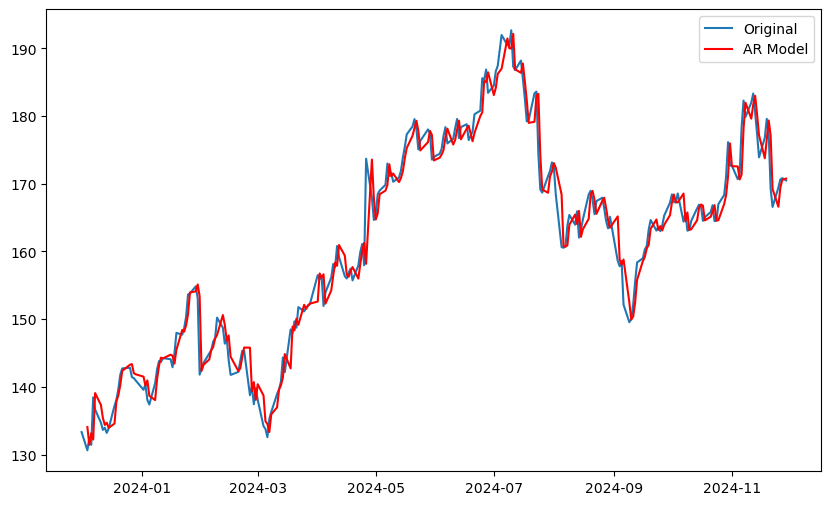

In [51]:
plt.figure(figsize =(10,6))
plt.plot(df["Close"], label ="Original")
plt.plot(model_ar_fit.fittedvalues, color = "red", label ="AR Model")
plt.legend()
plt.show()

# Forecasting with ARIMA Moving Average

In [52]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA

In [55]:
order = (0,5,1)
model_ma = ARIMA(df["Close"],order=order)
model_ma_fit = model_ma.fit()
print(model_ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 5, 1)   Log Likelihood                -960.301
Date:                Wed, 11 Dec 2024   AIC                           1924.602
Time:                        17:12:57   BIC                           1931.613
Sample:                             0   HQIC                          1927.425
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      3.853     -0.259      0.795      -8.552       6.553
sigma2       140.8166    542.577      0.260      0.795    -922.615    1204.248
Ljung-Box (L1) (Q):                 131.97   Jarque-

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

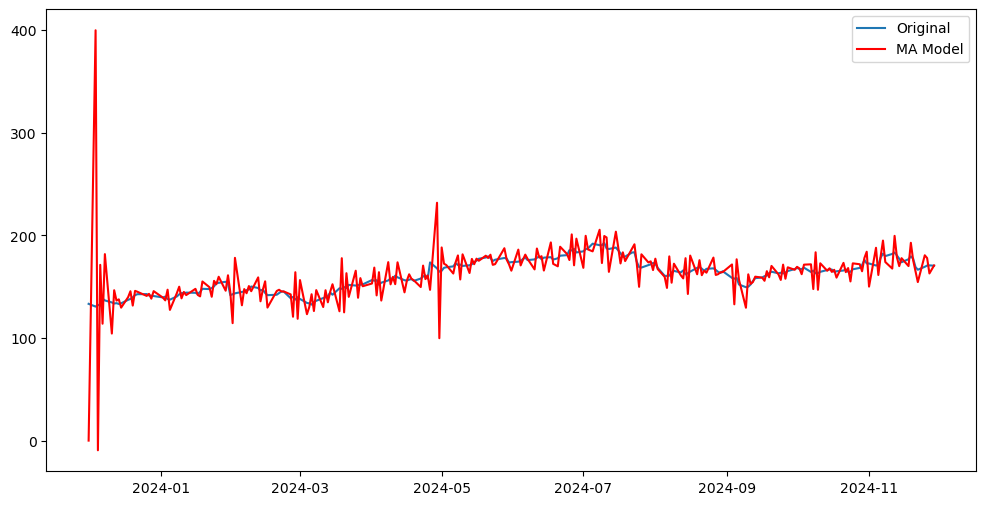

In [57]:
plt.figure(figsize =(12,6))
plt.plot(df["Close"], label ="Original")
plt.plot(model_ma_fit.fittedvalues.dropna(),color="red",label="MA Model")
plt.legend()
plt.show()

#Identifying optimal Order

In [60]:
!pip install pmdarima

In [61]:
from pmdarima.arima import auto_arima

In [62]:
autoarima_model = auto_arima(df["Close"],seasonal=False, stepwise=True, suppress_warnings = True)
order = autoarima_model.get_params()["order"]
print("Optimal ARIMA order is ", order)

Optimal ARIMA order is  (0, 1, 0)


In [64]:
model = ARIMA(df ["Close"], order = order)
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -604.839
Date:                Wed, 11 Dec 2024   AIC                           1211.678
Time:                        17:17:59   BIC                           1215.199
Sample:                             0   HQIC                          1213.095
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.3952      0.343     21.581      0.000       6.724       8.067
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               314.34
Prob(Q):                              0.85   Pr

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# ARMA

In [67]:
order = (2,0,3)
model_arma =ARIMA(df["Close"], order = order)
model_arma_fit = model_arma.fit()
print(model_arma_fit.summary())

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -606.986
Date:                Wed, 11 Dec 2024   AIC                           1227.972
Time:                        17:20:02   BIC                           1252.650
Sample:                             0   HQIC                          1237.903
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.0236      9.691     16.203      0.000     138.030     176.018
ar.L1          0.8789      0.850      1.033      0.301      -0.788       2.546
ar.L2          0.1100      0.842      0.131      0.8

# SARIMA

In [68]:
df["Close_diff10"] =df["Close"]-df["Close"].shift(10)
df["Close_diff10"]

Date
2023-12-01          NaN
2023-12-04          NaN
2023-12-05          NaN
2023-12-06          NaN
2023-12-07          NaN
                ...    
2024-11-22   -13.289993
2024-11-25   -12.540009
2024-11-26   -12.700012
2024-11-27    -9.669998
2024-11-29    -6.860001
Name: Close_diff10, Length: 251, dtype: float64

<Axes: xlabel='Date'>

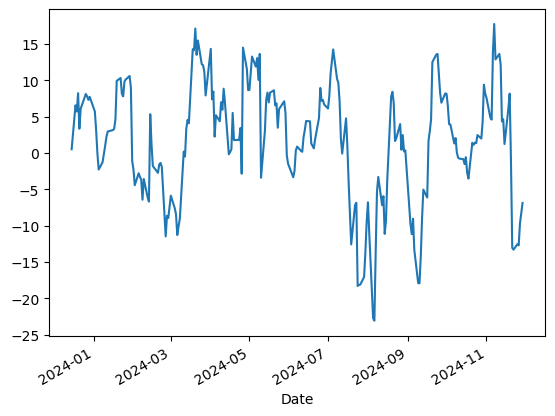

In [69]:
df["Close_diff10"].dropna().plot()

In [70]:
score10 = adfuller(df["Close_diff10"].dropna())
score10

(-3.299398386066039,
 0.014905388078974244,
 10,
 230,
 {'1%': -3.459105583381277,
  '5%': -2.8741898504150574,
  '10%': -2.5735117958412097},
 1193.7296836597934)

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

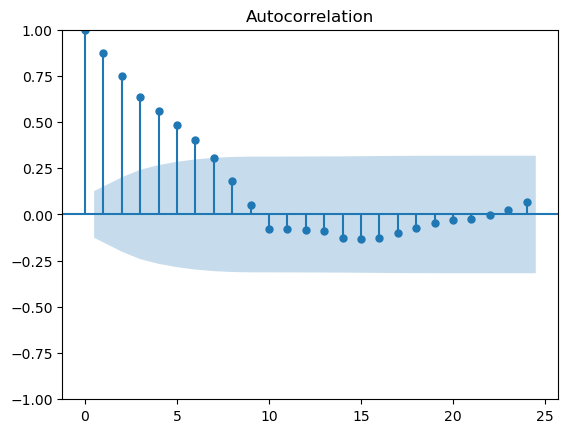

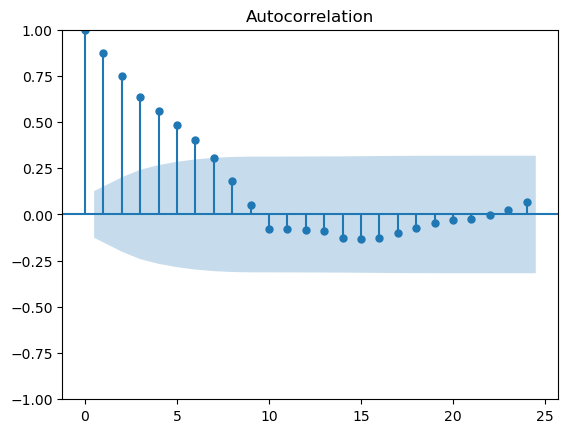

In [72]:
plot_acf(df["Close_diff10"].dropna())

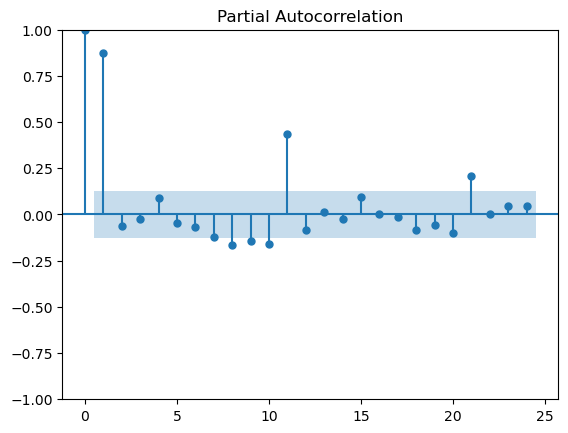

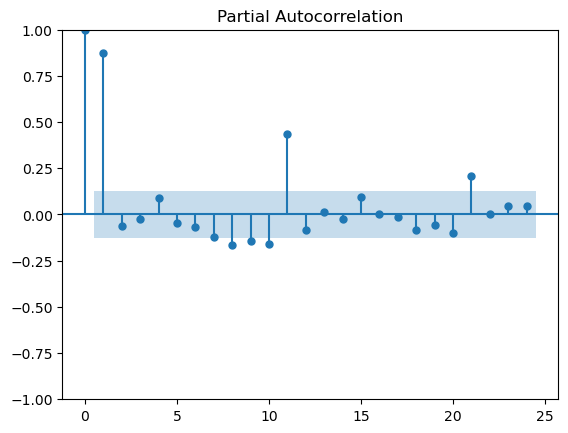

In [73]:
plot_pacf(df["Close_diff10"].dropna())

In [74]:
import statsmodels.api as sm
model_sarima = sm.tsa.statespace.SARIMAX(df["Close"],order=(0,1,0),seasonal_order=(0,1,0,24))
model_sarima_fit= model_sarima.fit()
model_sarima_fit.summary()

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood                -609.396
Date:                            Wed, 11 Dec 2024   AIC                           1220.792
Time:                                    17:21:52   BIC                           1224.213
Sample:                                         0   HQIC                          1222.172
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.8713      0.853     15.093      0.000      11.200      14.543
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                40.15
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.19
Prob(H) (two-sided):                  0.38   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

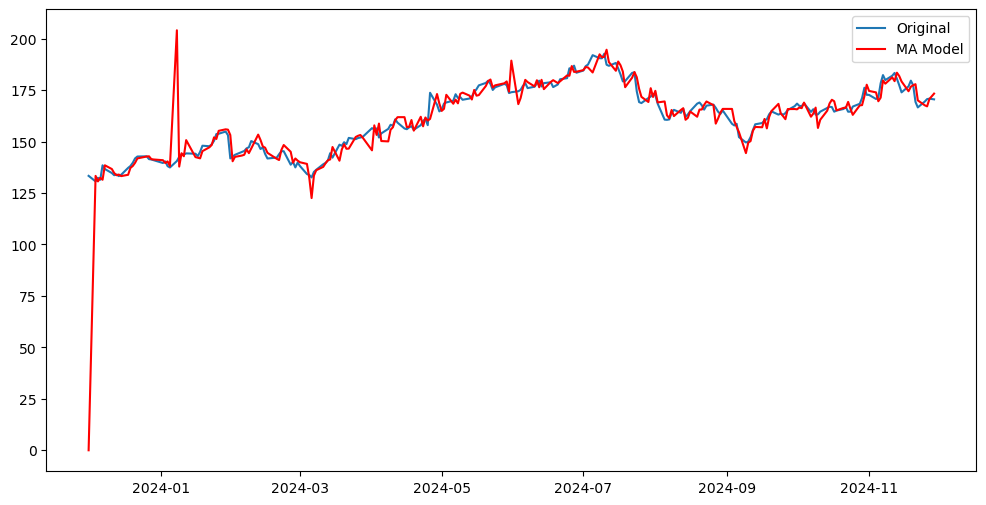

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"],label="Original")
plt.plot(model_sarima_fit.fittedvalues.dropna(),color="red",label="MA Model")
plt.legend()
plt.show()

# The Model which has Lowest AIC Value is SARIMA 1220.792
This technique is best for Forecasting Google Data

In [76]:
TSLA_SDATA = yf.download("TSLA", start='2023-12-01',end='2024-12-01')

[*********************100%***********************]  1 of 1 completed


In [77]:
TSLA_SDATA

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300
...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900


In [89]:
TSLA_SDATA.to_excel("Tesla.xlsx")

In [97]:
df = pd.read_excel("C:\\Users\\THRYAMBICA S\\Downloads\\Tesla.xlsx")

In [98]:
df.set_index('Date',inplace = True)

In [99]:
df.head()

,Close
Date,
2023-12-01,238.830002
2023-12-04,235.580002
2023-12-05,238.720001
2023-12-06,239.369995
2023-12-07,242.639999


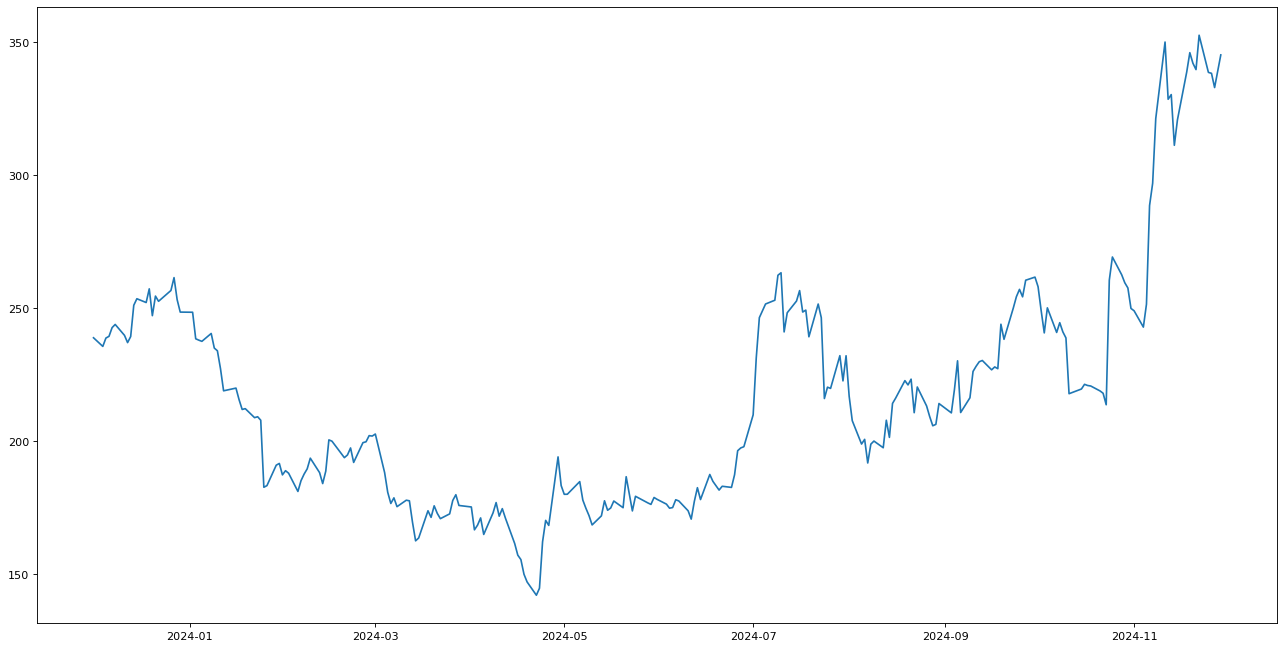

In [101]:
plt.figure(figsize=(20,10),dpi=80)
plt.title = ("Tesla Stock Price")
plt.plot(df.Close)

In [102]:
from statsmodels.tsa.stattools import kpss

In [106]:
stats, p,lags,critical_values = kpss(df["Close"], "ct")

C:\Users\THRYAMBICA S\AppData\Local\Temp\ipykernel_2236\2910823755.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p,lags,critical_values = kpss(df["Close"], "ct")


In [104]:
stats

0.40525811669629674

In [105]:
p

0.01

In [107]:
critical_values

{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}

In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
score  = adfuller(df["Close"])

In [110]:
score

(-0.21546653898451448,
 0.9366527608531472,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1687.5730444043124)

In [111]:
df["Close_diff"]= df ["Close"]-df["Close"].shift(1)
df["Close_diff"]

Date
2023-12-01          NaN
2023-12-04    -3.250000
2023-12-05     3.139999
2023-12-06     0.649994
2023-12-07     3.270004
                ...    
2024-11-22    12.919983
2024-11-25   -13.970001
2024-11-26    -0.359985
2024-11-27    -5.339996
2024-11-29    12.269989
Name: Close_diff, Length: 251, dtype: float64

<Axes: xlabel='Date'>

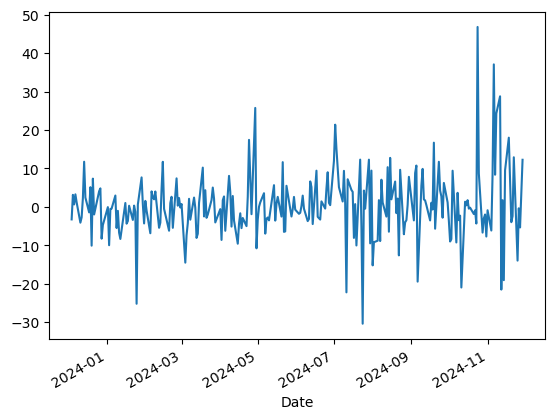

In [112]:
df["Close_diff"].dropna().plot()

In [114]:
score1 = adfuller(df["Close_diff"].dropna())
score1

(-15.615983299237968,
 1.7558357345756685e-28,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 1681.1655605148367)

In [116]:
df["Close_diff5"] = df["Close"]-df["Close"].shift(5)
df["Close_diff5"]

Date
2023-12-01          NaN
2023-12-04          NaN
2023-12-05          NaN
2023-12-06          NaN
2023-12-07          NaN
                ...    
2024-11-22    31.839996
2024-11-25    -0.149994
2024-11-26    -7.769989
2024-11-27    -9.139984
2024-11-29     5.519989
Name: Close_diff5, Length: 251, dtype: float64

<Axes: xlabel='Date'>

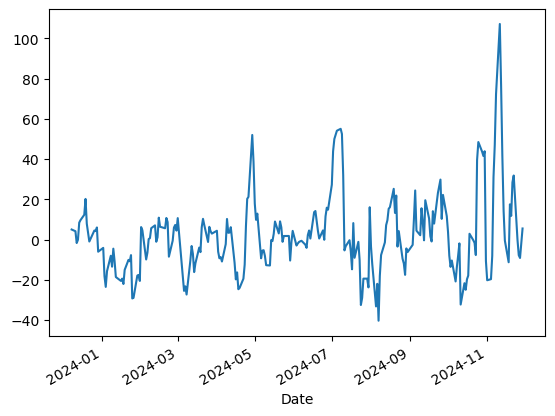

In [117]:
df["Close_diff5"].dropna().plot()

In [118]:
score5 =adfuller(df["Close_diff5"].dropna())

score5

(-3.3380561224640366,
 0.013260733633716925,
 16,
 229,
 {'1%': -3.4592326027153493,
  '5%': -2.8742454699025872,
  '10%': -2.5735414688888465},
 1730.4965726920989)

In [119]:
!pip install statsmodels

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

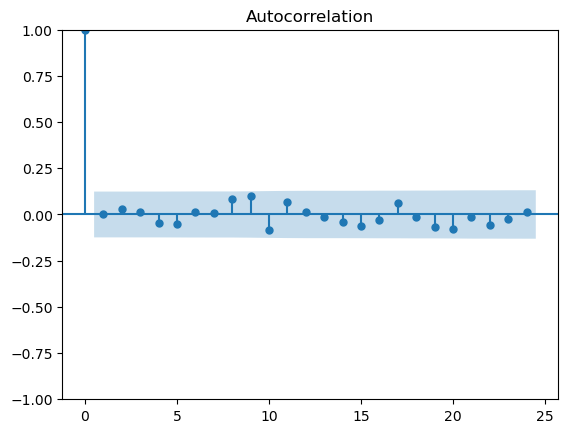

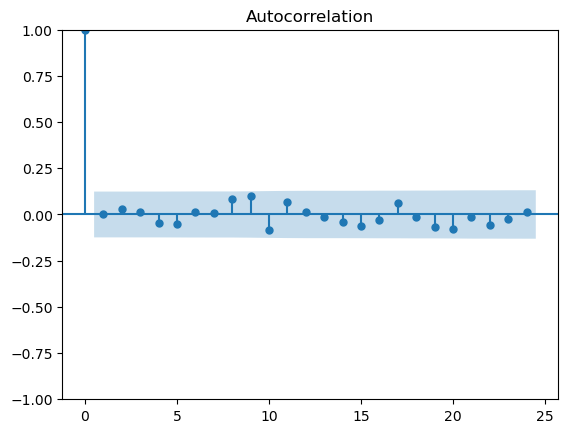

In [120]:
plot_acf(df["Close_diff"].dropna())

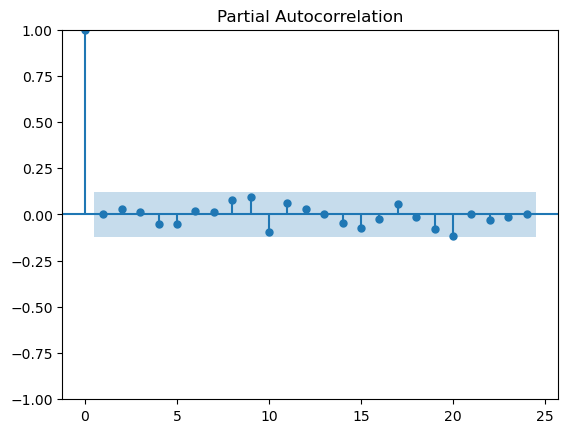

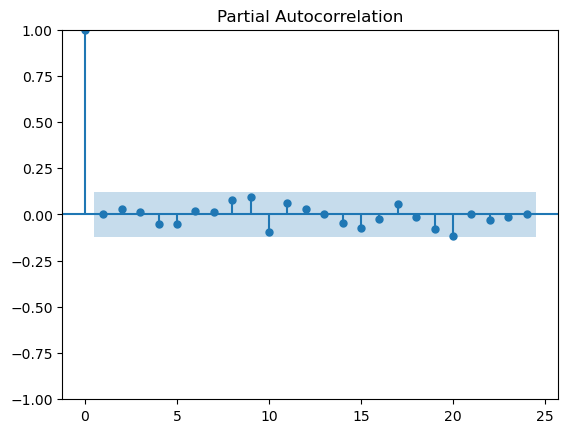

In [121]:
plot_pacf(df["Close_diff"].dropna())

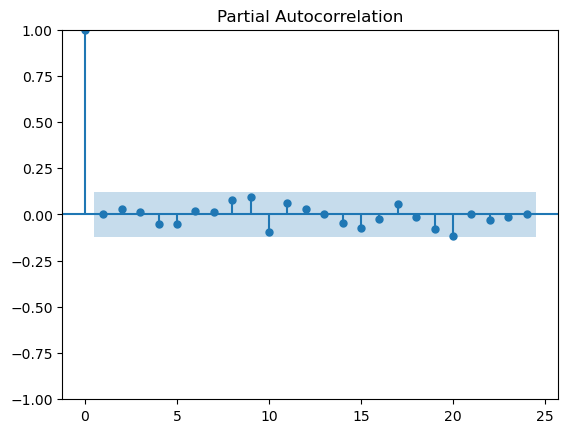

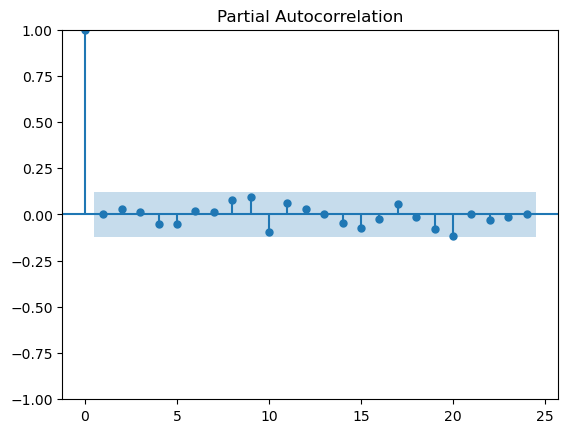

In [122]:
plot_pacf(df["Close_diff"].dropna())

# Forecasting with AR Using AutoReg

In [140]:
from statsmodels.tsa.ar_model import AutoReg

In [124]:
model_ar = AutoReg(df["Close"],lags=1)

model_ar_fit = model_ar.fit()

print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  251
Model:                     AutoReg(1)   Log Likelihood                -893.792
Method:               Conditional MLE   S.D. of innovations              8.639
Date:                Wed, 11 Dec 2024   AIC                           1793.585
Time:                        17:37:37   BIC                           1804.149
Sample:                             1   HQIC                          1797.837
                                  251                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0227      2.815      0.363      0.716      -4.495       6.540
Close.L1       0.9972      0.013     77.968      0.000       0.972       1.022
                                    Roots           

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


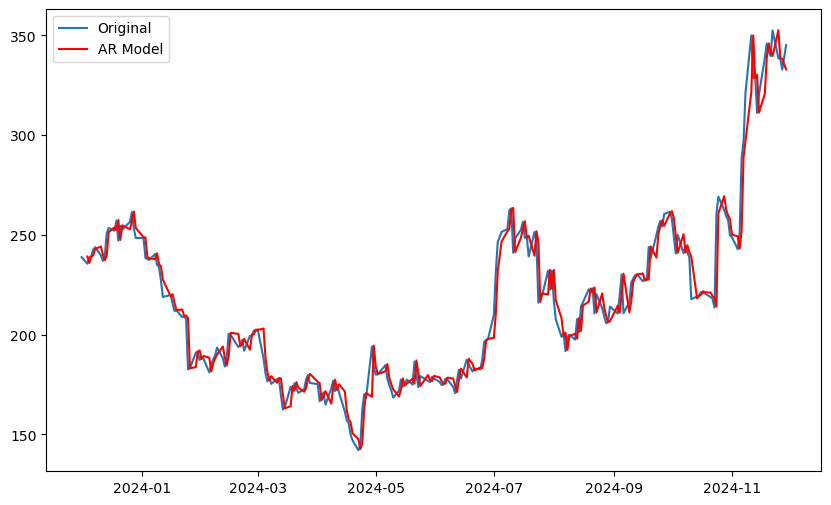

In [125]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_ar_fit.fittedvalues,color="red",label="AR Model")

plt.legend()

plt.show()

# Forecasting with ARIMA moving average

In [126]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA 

In [127]:
order = (0,5,1) #(p,d,q)

model_ma = ARIMA(df["Close"],order=order)

model_ma_fit = model_ma.fit()

print(model_ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 5, 1)   Log Likelihood               -1252.441
Date:                Wed, 11 Dec 2024   AIC                           2508.882
Time:                        17:38:03   BIC                           2515.893
Sample:                             0   HQIC                          2511.705
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9988      0.798     -1.252      0.210      -2.562       0.564
sigma2      1516.2222   1226.304      1.236      0.216    -887.290    3919.735
Ljung-Box (L1) (Q):                 140.02   Jarque-

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

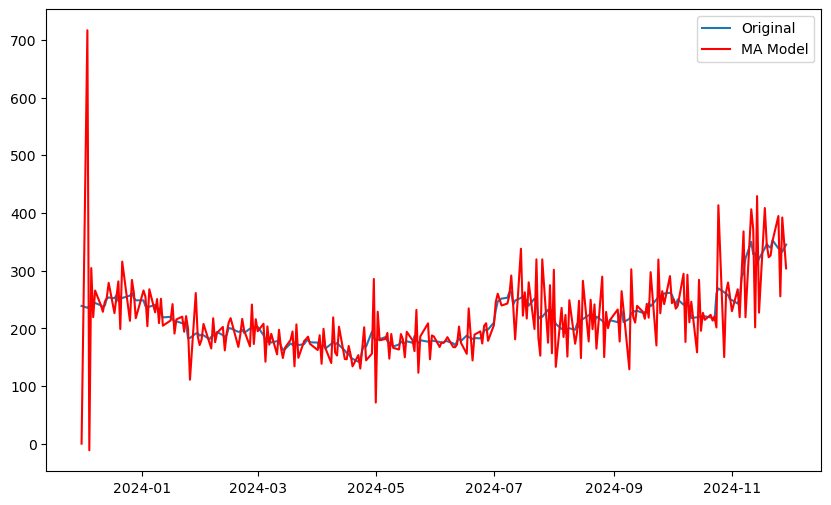

In [128]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_ma_fit.fittedvalues.dropna(),color="red",label="MA Model")

plt.legend()

plt.show()

#Identifying optimal order

In [129]:
from pmdarima.arima import auto_arima

In [130]:
autoarima_model = auto_arima(df["Close"],seasonal=False, stepwise=True, suppress_warnings = True)

order = autoarima_model.get_params()["order"]

print("Optimal ARIMA order is ", order)

Optimal ARIMA order is  (0, 1, 0)


In [131]:
model = ARIMA(df["Close"],order=order)

result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -894.118
Date:                Wed, 11 Dec 2024   AIC                           1790.237
Time:                        17:38:38   BIC                           1793.758
Sample:                             0   HQIC                          1791.654
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        74.8188      3.503     21.358      0.000      67.953      81.685
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               305.60
Prob(Q):                              0.96   Pr

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# ARMA

In [142]:
order = (2,0,3) #(p,d,q)
model_arma = ARIMA (df["Close"], order=order)
model_arma_fit = model_arma.fit()
print(model_arma_fit.summary())

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -898.865
Date:                Wed, 11 Dec 2024   AIC                           1811.730
Time:                        21:13:21   BIC                           1836.408
Sample:                             0   HQIC                          1821.661
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        223.2528     42.272      5.281      0.000     140.401     306.105
ar.L1          0.7098      1.556      0.456      0.648      -2.341       3.760
ar.L2          0.2706      1.536      0.176      0.8

In [133]:
df["Close_diff10"] =df["Close"]-df["Close"].shift(10)

df["Close_diff10"]

Date
2023-12-01          NaN
2023-12-04          NaN
2023-12-05          NaN
2023-12-06          NaN
2023-12-07          NaN
                ...    
2024-11-22    31.339996
2024-11-25   -11.410004
2024-11-26     9.740021
2024-11-27     2.650024
2024-11-29    33.980011
Name: Close_diff10, Length: 251, dtype: float64

<Axes: xlabel='Date'>

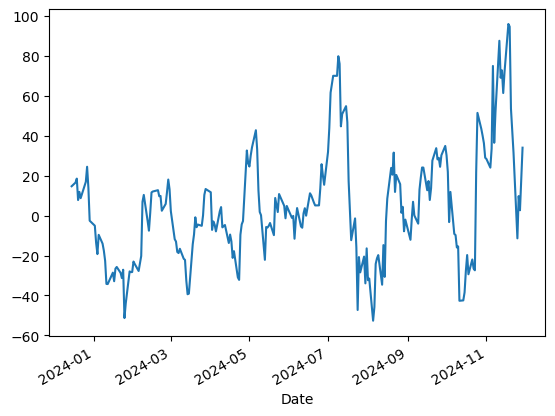

In [134]:
df["Close_diff10"].dropna().plot()

In [135]:
score10 = adfuller(df["Close_diff10"].dropna())

score10

(-2.6936417043521823,
 0.07514500935106197,
 10,
 230,
 {'1%': -3.459105583381277,
  '5%': -2.8741898504150574,
  '10%': -2.5735117958412097},
 1738.2526445378953)

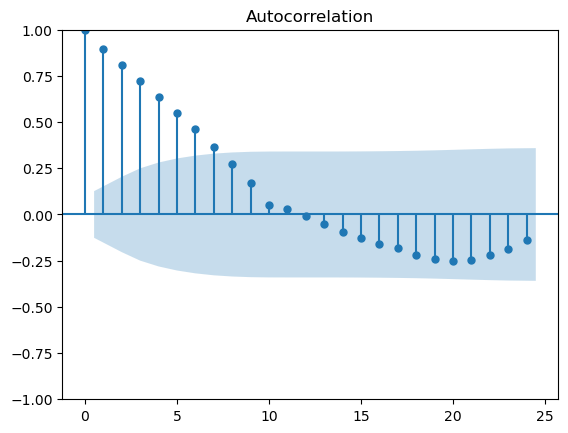

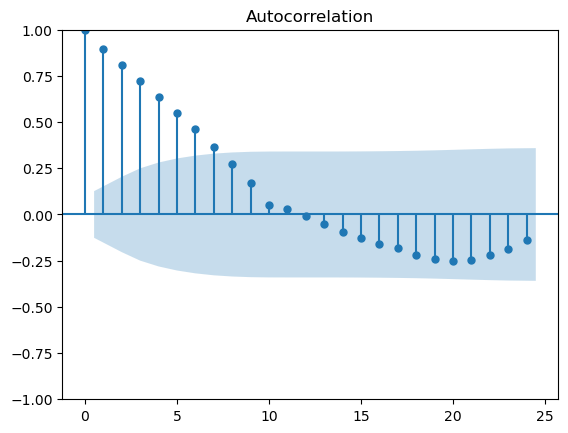

In [136]:
plot_acf(df["Close_diff10"].dropna())

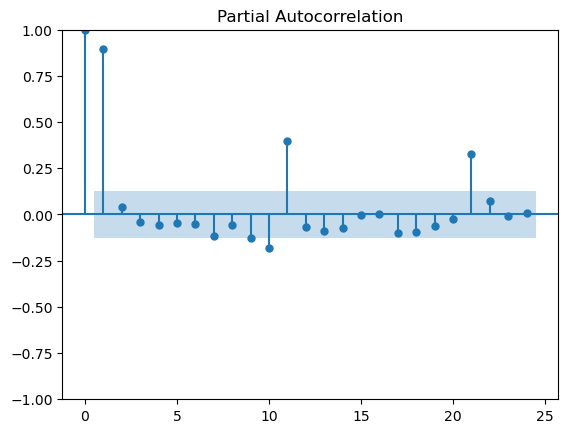

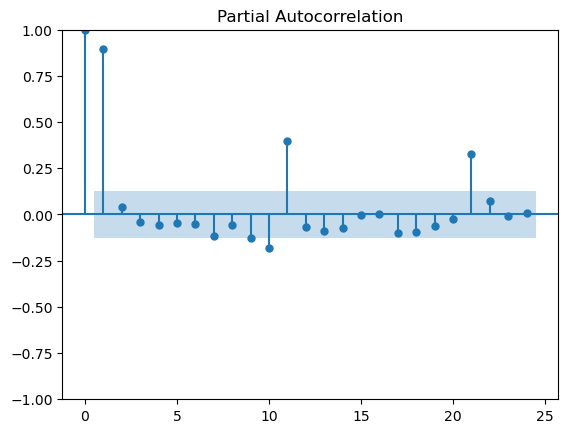

In [137]:
plot_pacf(df["Close_diff10"].dropna())

# SARIMA

In [143]:
import statsmodels.api as sm
model_sarima = sm.tsa.statespace.SARIMAX(df["Close"],order=(0,1,0),seasonal_order=(0,1,0,24))
model_sarima_fit= model_sarima.fit()
model_sarima_fit.summary()

C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THRYAMBICA S\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood                -878.131
Date:                            Wed, 11 Dec 2024   AIC                           1758.262
Time:                                    21:13:51   BIC                           1761.683
Sample:                                         0   HQIC                          1759.643
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       138.8234      7.742     17.931      0.000     123.649     153.998
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               128.54
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.49   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

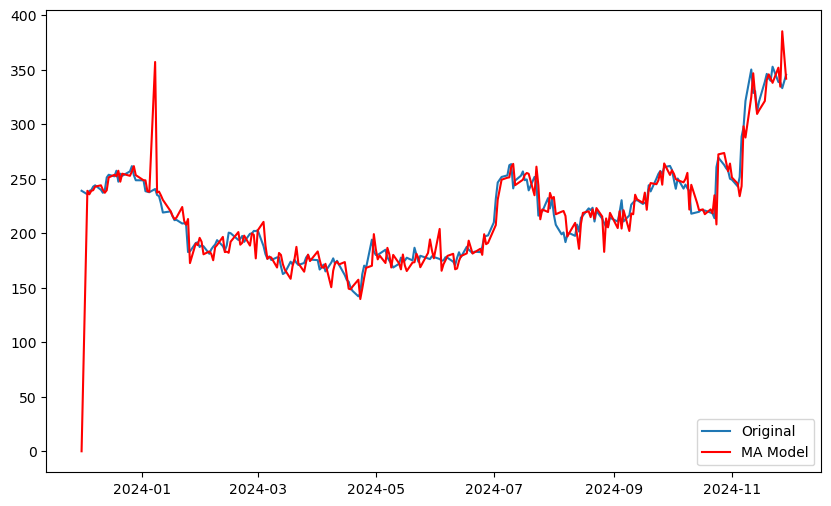

In [139]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_sarima_fit.fittedvalues.dropna(),color="red",label="MA Model")

plt.legend()

plt.show()

# From the above, the Model which has Lowest AIC Value(1758.262) is SARIMA 
This technique can be used for Analysis for Tesla